In [164]:
import git_access
import json
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx

In [202]:
access_token = '7eb0bbd201b3ea12f1371b4d435caa15e2ac369b'
repo_owner = 'rspec'
source_type = 'github_repo'
git_url = 'git://github.com/rspec/rspec-rails.git'
api_base_url = 'http://api.github.com'
repo_name = 'rspec-rails'
url_type = 'issues'
url_details = 'comments'
client = git_access.GitHubClient({'access_token': access_token,
                       'repo_owner': repo_owner, 
                       'source_type': source_type, 
                       'git_url': git_url, 
                       'api_base_url': api_base_url, 
                       'repo_name': repo_name}) 
base_url = api_base_url + '/repos/' + repo_owner + '/' + repo_name + '/' + url_type
advanced_url = base_url + '/' + url_details
x = [0]*100
check = 1
page_number = 1
comments_details = []
while len(x) >= 100:
    check -= 1
    paged_url = advanced_url + '?page=' + str(page_number) + '&per_page=100'
    page_number += 1
    print(paged_url)
    res = client.get(paged_url)
    x = json.loads(res.content)
    for i in range(len(x)):
        issue_number = x[i]['issue_url'][len(base_url)+2:]
        user_logon = x[i]['user']['login']
        author_association = x[i]['author_association']
        comments_details.append([issue_number,user_logon,author_association])

http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=1&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=2&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=3&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=4&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=5&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=6&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=7&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=8&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=9&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=10&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=11&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues/comments?page=12&per_page=100
http://api.gi

In [203]:
x = [0]*100
check = 1
page_number = 1
issue_details = []
while len(x) >= 100:
    check -= 1
    paged_url = base_url + '?state=' + 'all' + '&page=' + str(page_number) + '&per_page=100'
    page_number += 1
    print(paged_url)
    res = client.get(paged_url)
    x = json.loads(res.content)
    for i in range(len(x)):
        issue_number = x[i]['number']
        user_logon = x[i]['user']['login']
        author_type = x[i]['user']['type']
        issue_details.append([issue_number,user_logon,author_type])

http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=1&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=2&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=3&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=4&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=5&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=6&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=7&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=8&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=9&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=10&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=11&per_page=100
http://api.github.com/repos/rspec/rspec-rails/issues?state=all&page=12&per_page=100
h

In [204]:
comments_details_df = pd.DataFrame(comments_details, columns = ['Issue_id','user_logon','commenter_type'])
issue_details_df = pd.DataFrame(issue_details, columns = ['Issue_id','user_logon','commenter_type'])

In [166]:
comments_details_df.drop(['commenter_type'], inplace=True, axis = 1)
issue_details_df.drop(['commenter_type'], inplace=True, axis = 1)

In [205]:
comm_details_df = pd.concat([comments_details_df,issue_details_df])

In [206]:
uniq_issues = comm_details_df.Issue_id.unique()
uniq_users = comm_details_df.user_logon.unique()
connection_matrix = np.ndarray(shape=(len(uniq_users),len(uniq_users)))
connection_matrix = np.zeros((len(uniq_users),len(uniq_users)), dtype=np.int)
user_dict = {}
rev_user_dict = {}
user_id = 0
for i in range(len(uniq_users)):
    user_dict[uniq_users[i]] = user_id
    rev_user_dict[user_id] = uniq_users[i]
    user_id += 1
for i in uniq_issues:
    issue_specific = comm_details_df[comm_details_df['Issue_id'] == i]
    participents = issue_specific.user_logon.unique()
    for j in range(len(participents)):
        comment_from = participents[j]
        comment_count = issue_specific[issue_specific['user_logon'] == comment_from].shape
        if len(participents) == 1:
            continue
        comment_to = np.delete(participents,np.where(participents == comment_from))
        for k in comment_to:
            connection_matrix[user_dict[comment_from]][user_dict[k]] += len(comment_count)

In [172]:
%matplotlib inline
def show_graph_with_labels(matrix):
    gr = nx.Graph()
    rows,cols = np.where(matrix > 0)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    #plt.figure(num=None, figsize = (100,100), dpi = 50, facecolor='w', edgecolor='k')
    #nx.draw(gr, node_size=500)
    #plt.show()
    return gr.degree(gr.nodes()),gr

In [207]:
degree, G = show_graph_with_labels(connection_matrix)

In [208]:
x = list(degree.values())
x.sort()
x = np.log(x)

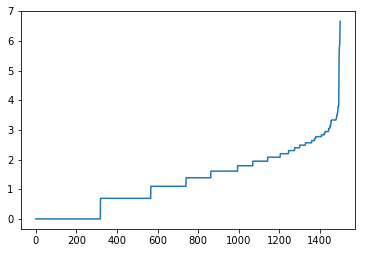

In [209]:
plt.plot(x)